In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall Customer Dataset.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

In [5]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


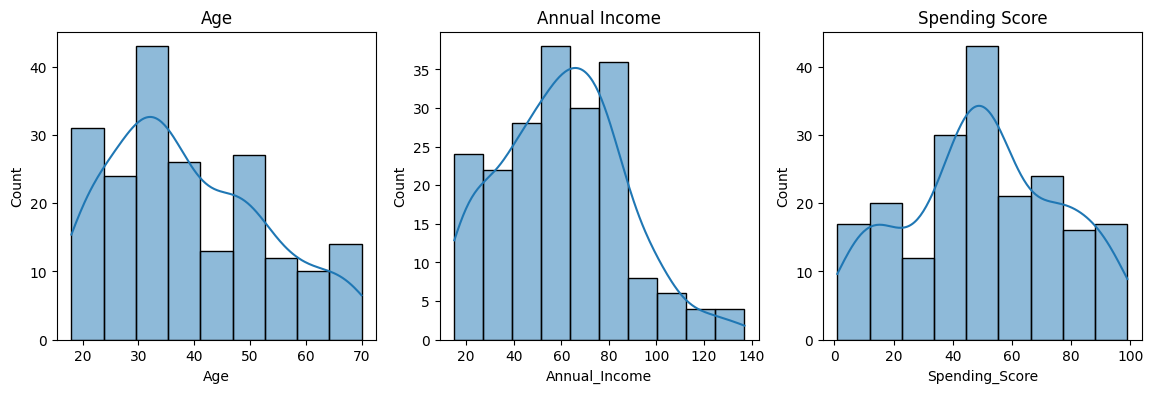

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(df["Age"], kde="True")
plt.title("Age")

plt.subplot(1,3,2)
sns.histplot(df["Annual_Income"], kde="True")
plt.title("Annual Income")

plt.subplot(1, 3, 3)
sns.histplot(df["Spending_Score"], kde="True")
plt.title("Spending Score")
plt.show()

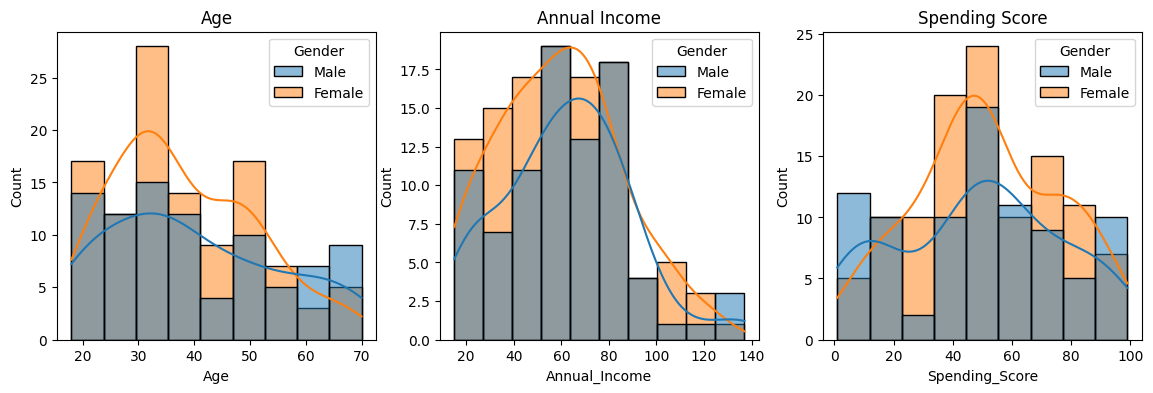

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(df, x="Age", kde="True", fill=True, hue="Gender")
plt.title("Age")

plt.subplot(1,3,2)
sns.histplot(df, x="Annual_Income", kde="True", fill=True, hue="Gender")
plt.title("Annual Income")

plt.subplot(1, 3, 3)
sns.histplot(df, x="Spending_Score", kde="True", fill=True, hue="Gender")
plt.title("Spending Score")
plt.show()

In [10]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: >

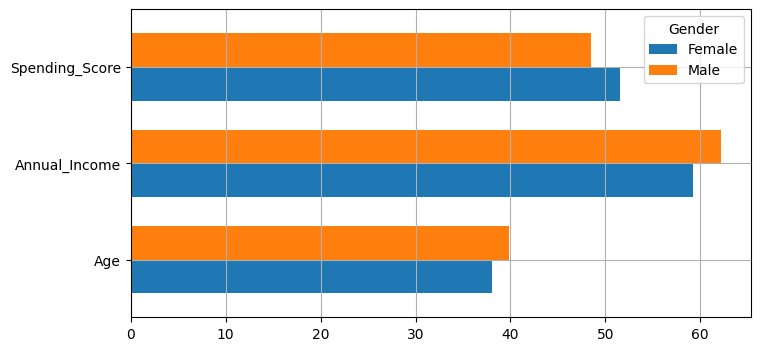

In [11]:
df.groupby(["Gender"])[["Age", "Annual_Income", "Spending_Score"]].mean().T.plot.barh(figsize=(8,4), width=0.7,grid="x")

In [13]:
ohe= OneHotEncoder(drop="first")

In [14]:
gender=ohe.fit_transform(df[["Gender"]])

In [16]:
gender.toarray()

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [17]:
ohe.get_feature_names_out()

array(['Gender_Male'], dtype=object)

In [18]:
df["Gender"]=gender.toarray()

In [19]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,0.0,20,16,6
3,4,0.0,23,16,77
4,5,0.0,31,17,40


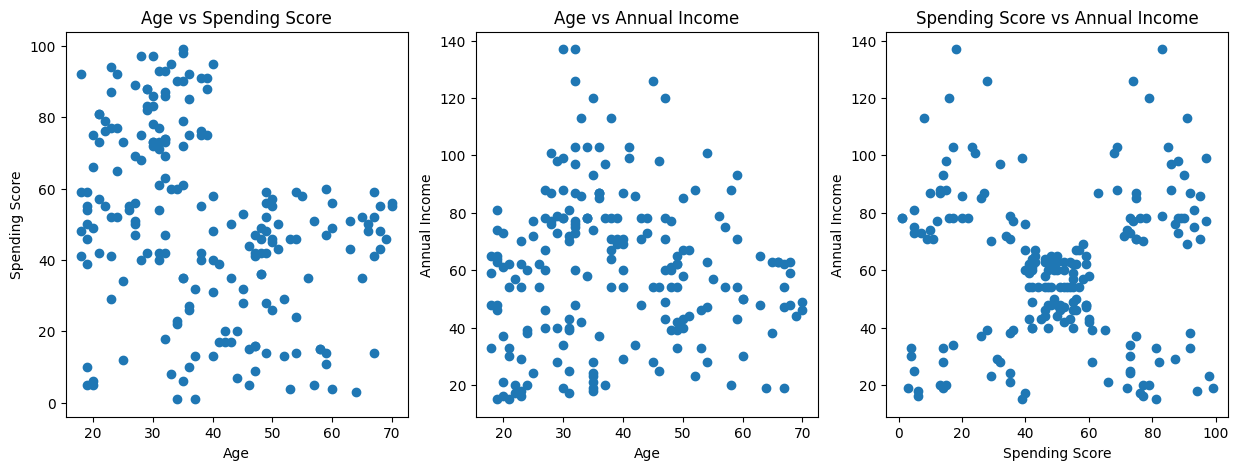

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df["Age"], df["Spending_Score"])
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.subplot(1,3,2)
plt.scatter(df["Age"], df["Annual_Income"])
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")

plt.subplot(1,3,3)
plt.scatter(df["Spending_Score"], df["Annual_Income"])
plt.title("Spending Score vs Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()

In [21]:
scaler= StandardScaler()

In [22]:
df[["Age", "Annual_Income", "Spending_Score"]]= scaler.fit_transform(df[["Age", "Annual_Income", "Spending_Score"]])

In [23]:
df.drop("CustomerID", axis=1, inplace=True)

In [24]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,-1.424569,-1.738999,-0.434801
1,1.0,-1.281035,-1.738999,1.195704
2,0.0,-1.352802,-1.700830,-1.715913
3,0.0,-1.137502,-1.700830,1.040418
4,0.0,-0.563369,-1.662660,-0.395980


In [25]:
inertia=[]
for i in range(1, 15):
    m=KMeans(n_clusters=i)
    m.fit(df)
    inertia.append(m.inertia_)

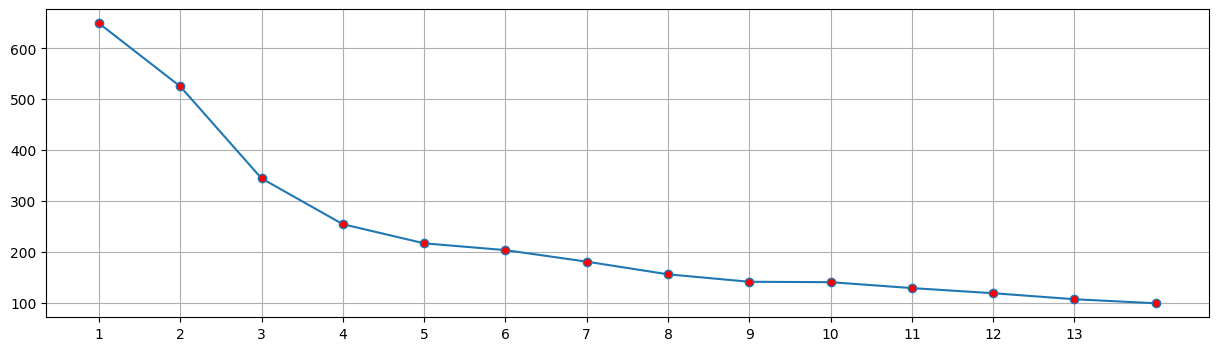

In [27]:
plt.figure(figsize=(15,4))
plt.plot(range(1,15), inertia, marker="o", markerfacecolor="red")
plt.xticks(range(1,14))
plt.grid()
plt.show()


In [28]:
model1= KMeans(n_clusters=5)

In [29]:
pred1= model1.fit_predict(df)
pred1

array([4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 4, 4, 4, 0, 0, 0, 0, 4, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [30]:
new_df=df.copy()

In [31]:
new_df["Classes"]=pred1

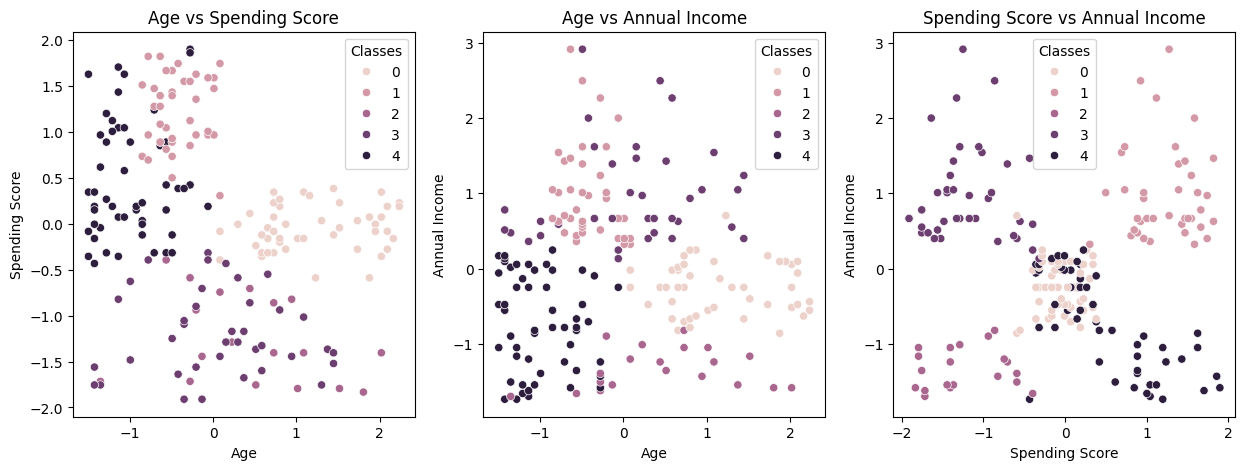

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(new_df, x="Age", y="Spending_Score", hue="Classes")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.subplot(1,3,2)
sns.scatterplot(new_df, x="Age", y="Annual_Income", hue="Classes")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")

plt.subplot(1,3,3)
sns.scatterplot(new_df, x="Spending_Score", y="Annual_Income", hue="Classes")
plt.title("Spending Score vs Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()

In [34]:
score=silhouette_score(df, pred1)
score

np.float64(0.35725340176648485)

In [35]:
model2= KMeans(n_clusters=6)


In [36]:
pred2=model2.fit_predict(df)

In [37]:
pred2

array([1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 4, 3, 4, 1, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 4, 5, 4, 5, 4, 1, 4, 3, 4, 5, 1,
       5, 4, 5, 1, 1, 1, 5, 1, 1, 3, 5, 5, 5, 3, 1, 3, 3, 1, 3, 5, 3, 1,
       5, 3, 1, 1, 3, 5, 3, 3, 3, 1, 5, 5, 1, 5, 3, 1, 3, 5, 1, 5, 5, 1,
       1, 5, 3, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 3, 1, 5, 1, 3, 3, 3, 3,
       3, 1, 5, 1, 1, 1, 3, 5, 5, 5, 1, 5, 5, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [38]:
new_df["Classes2"]=pred2

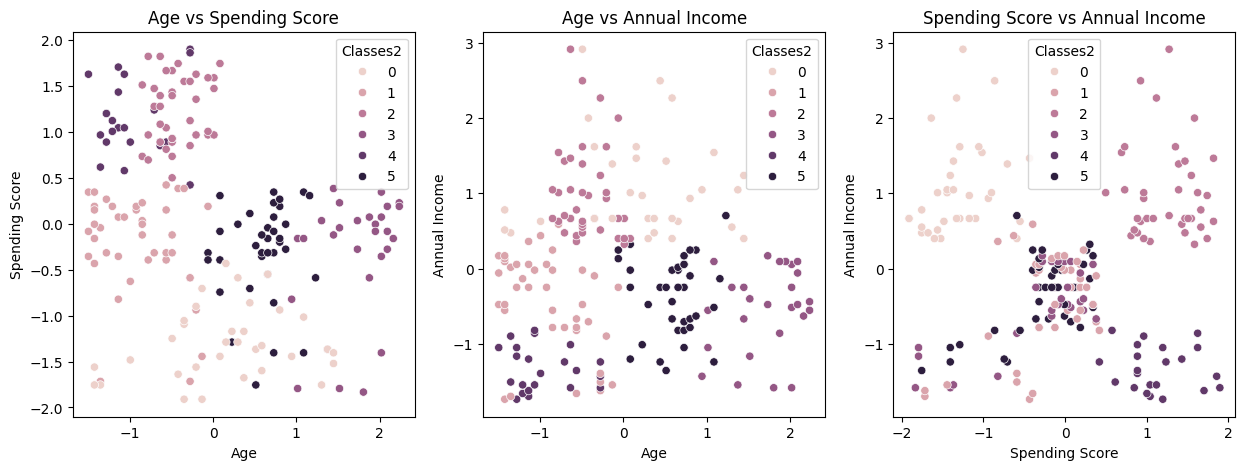

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(new_df, x="Age", y="Spending_Score", hue="Classes2")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.subplot(1,3,2)
sns.scatterplot(new_df, x="Age", y="Annual_Income", hue="Classes2")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")

plt.subplot(1,3,3)
sns.scatterplot(new_df, x="Spending_Score", y="Annual_Income", hue="Classes2")
plt.title("Spending Score vs Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show()

In [40]:
score=silhouette_score(df, pred2)
score

np.float64(0.31273656853444237)

In [41]:
grp0= new_df[new_df["Classes"]==0].index
grp1= new_df[new_df["Classes"]==1].index
grp2= new_df[new_df["Classes"]==2].index
grp3= new_df[new_df["Classes"]==3].index
grp4= new_df[new_df["Classes"]==4].index

In [44]:
df[["Age", "Annual_Income", "Spending_Score"]]= scaler.inverse_transform(df[["Age", "Annual_Income", "Spending_Score"]])

In [45]:
df.iloc[grp0][["Age", "Annual_Income", "Spending_Score"]].describe()

,Age,Annual_Income,Spending_Score
count,48.000000,48.000000,48.000000
mean,55.479167,54.062500,48.583333
std,8.886972,9.002142,6.506407
min,40.000000,38.000000,35.000000
25%,48.750000,47.000000,43.750000
50%,53.500000,54.000000,48.000000
75%,65.000000,62.000000,53.500000
max,70.000000,79.000000,60.000000


<Axes: ylabel='Frequency'>

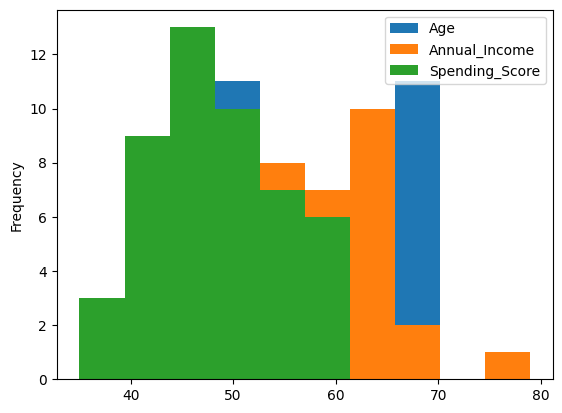

In [48]:
df.iloc[grp0][["Age", "Annual_Income", "Spending_Score"]].plot.hist()


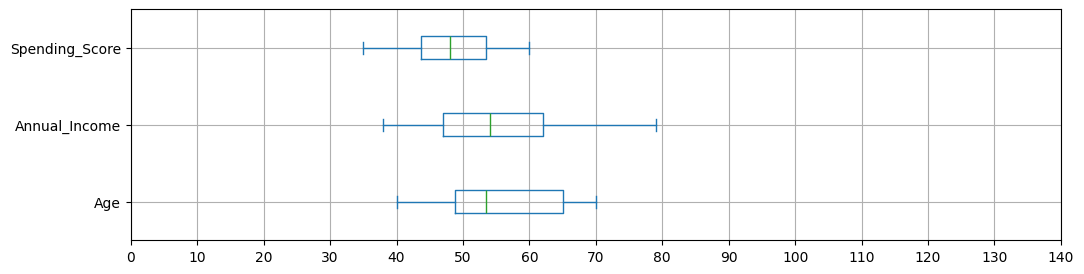

In [49]:
df.iloc[grp0][["Age", "Annual_Income", "Spending_Score"]].plot.box(vert=False, figsize=(12,3), grid=True)
plt.xticks(range(0,141, 10))
plt.show()

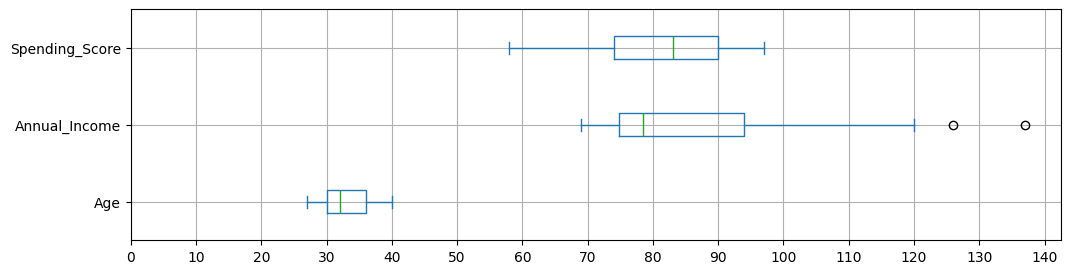

In [50]:
df.iloc[grp1][["Age", "Annual_Income", "Spending_Score"]].plot.box(vert=False, figsize=(12,3), grid=True)
plt.xticks(range(0,141, 10))
plt.show()

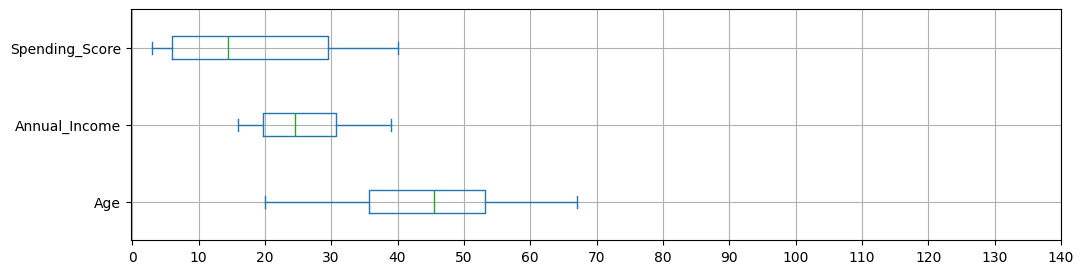

In [51]:
df.iloc[grp2][["Age", "Annual_Income", "Spending_Score"]].plot.box(vert=False, figsize=(12,3), grid=True)
plt.xticks(range(0,141, 10))
plt.show()

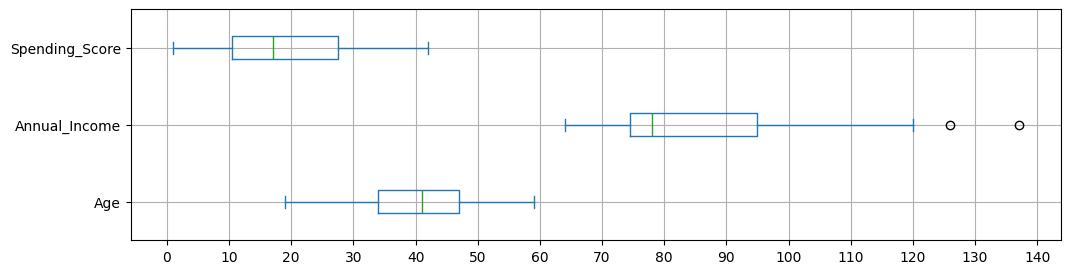

In [52]:
df.iloc[grp3][["Age", "Annual_Income", "Spending_Score"]].plot.box(vert=False, figsize=(12,3), grid=True)
plt.xticks(range(0,141, 10))
plt.show()

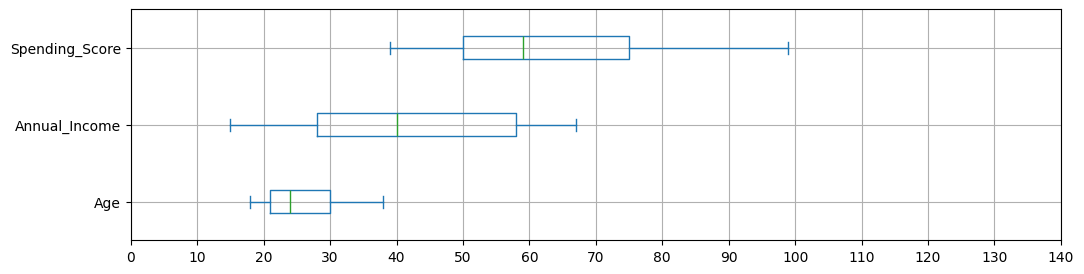

In [53]:
df.iloc[grp4][["Age", "Annual_Income", "Spending_Score"]].plot.box(vert=False, figsize=(12,3), grid=True)
plt.xticks(range(0,141, 10))
plt.show()

In [54]:
new_df.drop("Classes2", axis=1, inplace=True)

<Axes: >

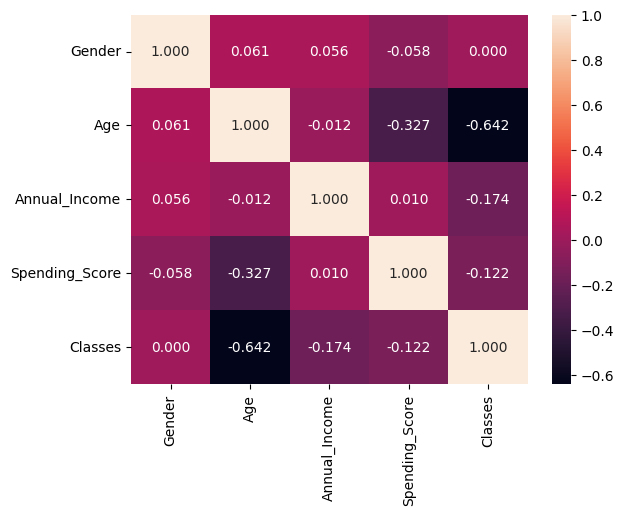

In [56]:
sns.heatmap(new_df.corr(), annot=True, fmt=".3f")

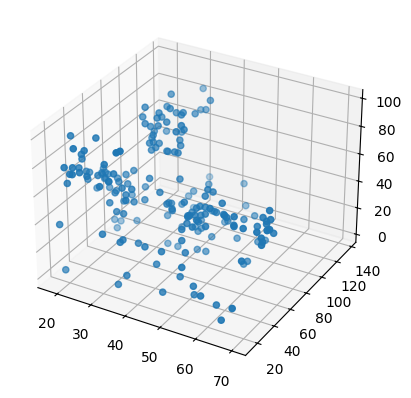

In [57]:
fig=plt.figure()
ax=fig.add_subplot(111, projection="3d")
ax.scatter(df["Age"], df["Annual_Income"], df["Spending_Score"], cmap="virdis")
plt.show()